# <font color=maroon> Lead Scoring Case Study

## Problem Statement
X Education, an online course provider for professionals, struggles with a low lead conversion rate of around 30%. Although many interested individuals visit their website and fill out contact forms, only a small percentage become paying customers. The company gathers leads from website visits and referrals, and the sales team reaches out through calls and emails.

To improve efficiency, X Education wants to identify the most promising leads, or ‘Hot Leads’. By focusing on these potential customers, the sales team can increase the overall conversion rate. The lead conversion process can be visualized as a funnel: many leads enter at the top, but only a few convert at the bottom.

X Education has tasked you with building a model to assign a lead score to each lead, indicating their likelihood of conversion. The goal is to help the sales team prioritize high-potential leads and achieve a target conversion rate of around 80%.

In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Loading the data from the "Leads.csv" file into a DataFrame called lead_df using pandas

lead_df = pd.read_csv("Leads.csv")

In [4]:
# Displaying the first 5 rows

lead_df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

In [5]:
# Checking the dimension of the dataset

lead_df.shape

(9240, 37)

In [6]:
# Checking column wise info of the dataset

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Displaying the statistical summary of dataset

lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000                    14.000000                   16.000000
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000                    15.000000                   18.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000                    18.000000                   20.000000

# Observation
Based on the summary, we can see that the columns 'Total Visits,' 'Total Time Spent on Website,' and 'Page Views Per Visit' have some unusual values, as there's a big gap between the smallest and largest numbers. We'll check this more closely with some additional data analysis later.

# Step 2: Data Quality Check & Cleaning

In [8]:
# Checking the datatype of the columns

lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

# Observation
- There are 7 columns with numbers (Lead Number, Asymmetrique Activity Score, Asymmetrique Profile Score, Converted, Total Visits, Total Time Spent on Website, Page Views Per Visit) and 30 columns with categories.
- All the columns already have the correct data types, so we don't need to change anything.

In [9]:
# Looking for duplicates and dropping the duplicates (if any)

lead_df.drop_duplicates(subset=None, inplace=True)

In [10]:
# Checking shape after dropping the duplicates

lead_df.shape

(9240, 37)

##### No duplicate values found

# Finding out which columns having the level 'Select'

In [11]:
Cols=list(lead_df.columns)
for i in Cols:
    if 'Select' in lead_df[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


We found out that the columns 'Specialization', 'How did you hear about X Education', 'Lead Profile', and 'City' have entries labeled 'Select'. This indicates that the customer did not choose an option while filling out the form. Therefore, it's better to replace these 'Select' entries with 'Null' values.

In [12]:
# Imputing 'Select' with NaN' 

lead_df = lead_df.replace('Select', np.nan)

In [13]:
# Checking if any 'Select' values remain after replacing them with 'NaN'

Columns=list(lead_df.columns)
for i in Columns:
    if 'Select' in lead_df[i].values:
        print(i)

# Checking Null/Missing values

In [14]:
# Checking the null values column wise

lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
# Checking the percentage of missing/null values

round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Note: Lead Quality (~51%), Tags, Asymmetrique scores, Profile, and Last Notable Activity are added by the sales team after contacting the leads, so we can remove these columns.

For the remaining columns, we will analyze whether to keep or remove them.

 Missing value (~45%)
1. Asymmetrique Activity Index
2. Asymmetrique Profile Index
3. Asymmetrique Activity Score
4. Asymmetrique Profile Score

# Missing Value Treatment 

Removing columns that have more than 30% missing values.

In [16]:
# Listing all the columns having more than 30% missing values into 'missing_columns'

missing_columns_30 = lead_df.columns[100*(lead_df.isnull().sum()/len(lead_df)) > 30]
print(missing_columns_30)

Index(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')


In [17]:
miss_col=missing_columns_30.drop('Specialization')

# Creating a duplicate of the original DataFrame to keep the original data unchanged

In [18]:
# Creating a copy of the original datarframe 

lead_df1 = lead_df.copy()

In [19]:
# Removing columns that have more than 30% missing values

lead_df1 = lead_df1.drop(miss_col, axis=1).copy()

In [20]:
# Checking dimension after dropping columns:-

lead_df1.shape

(9240, 28)

In [21]:
# Checking the remaining columns for missing values

round(100*(lead_df1.isnull().sum()/len(lead_df1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

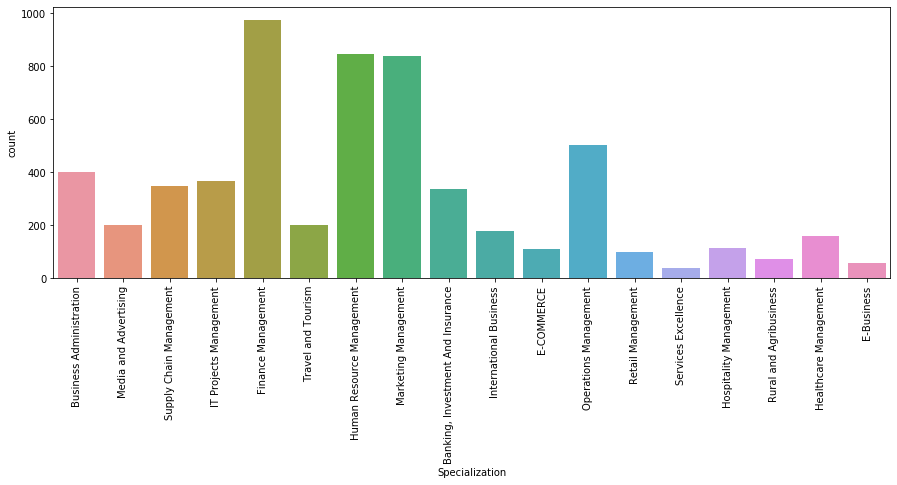

In [22]:
# Plotting a count plot of 'Specialization' to see the data distribution

plt.figure(figsize=(15, 5)) 
sns.countplot(x='Specialization', data=lead_df1) 
plt.xticks(rotation=90) 
plt.show()

In [23]:
# Imputing the missing values with 'Other' 

lead_df1['Specialization'].fillna('Other',inplace=True)

Analyzing columns with less than 30% missing values

In [24]:
# Listing all the columns having missing values into 'Remaining_Missing'

Remaining_Missing = lead_df1.columns[(100*(lead_df1.isnull().sum()/len(lead_df1)) < 30) & (100*(lead_df1.isnull().sum()/len(lead_df1)) >0) ]
print(Remaining_Missing)

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course'], dtype='object')


In [25]:
# Checking the value counts of the variable 'What is your current occupation'

lead_df1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
# Plotting a count plot to check data counts in column 'What is your current occupation'

# plt.figure(figsize = (15,5))
# sns.countplot(lead_df1['What is your current occupation'])
# plt.show()

# Use the code below if this one doesn't work

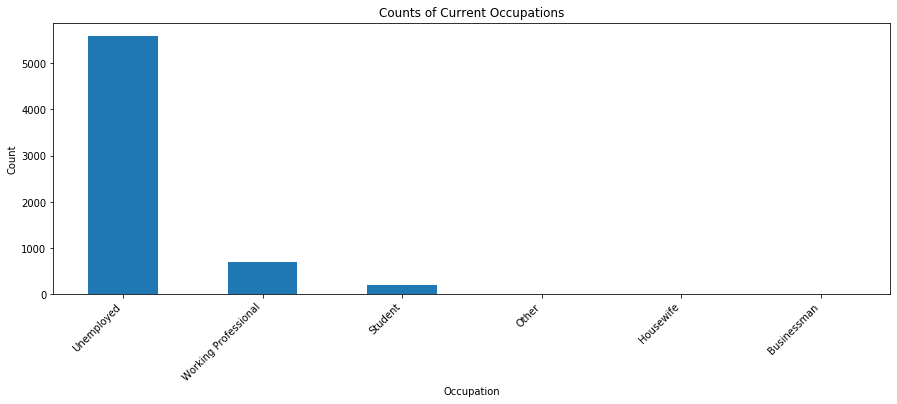

In [27]:
# Plotting a count plot to check data counts in column 'What is your current occupation'

Occupation_Counts = lead_df1['What is your current occupation'].value_counts()

plt.figure(figsize=(15, 5))
Occupation_Counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Counts of Current Occupations')
plt.xticks(rotation=45, ha='right')
plt.show()

Observation:
We noticed that 'Unemployed' has the highest count, but since we don't know the current occupation of the lead, we'll fill in the missing values with 'Other'. We'll create a separate category called 'Other' for this purpose.

In [28]:
# Imputing the missing value with 'Other' 

lead_df1['What is your current occupation'].fillna('Other',inplace=True)

Count of 'Other': 2706


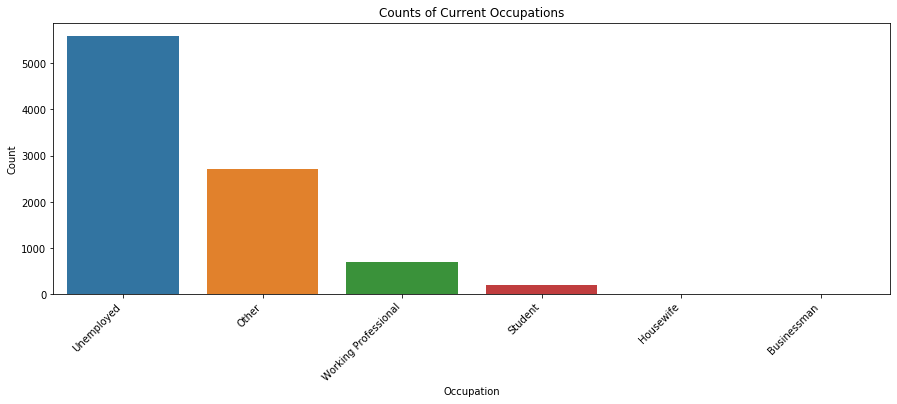

In [29]:
# Assuming lead_df1 is your DataFrame

Occupation_Counts = lead_df1['What is your current occupation'].value_counts()

# Display the count of 'Other'

Other_Count = Occupation_Counts.get('Other', 0)
print(f"Count of 'Other': {Other_Count}")

# Plotting the counts

plt.figure(figsize=(15, 5))
sns.countplot(x=lead_df1['What is your current occupation'], order=Occupation_Counts.index)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Counts of Current Occupations')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
# Checking the value count of 'What matters most to you in choosing a course' variable

lead_df1['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

# Observation:
The most common response is 'Better Career Prospects', so we'll use that to replace any missing values.

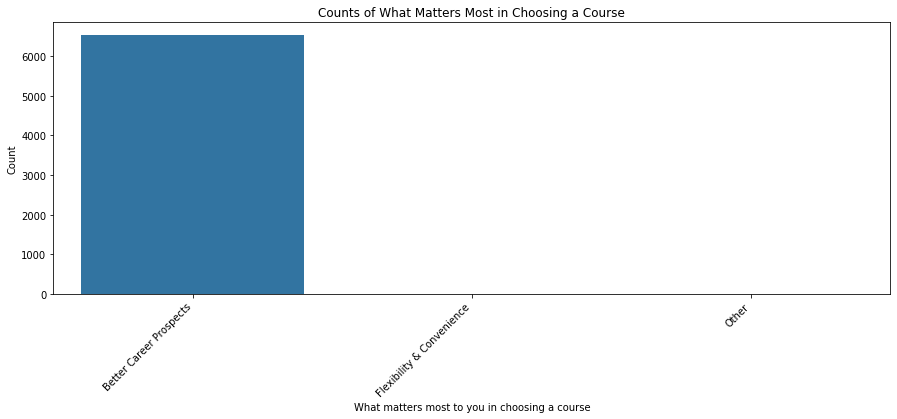

In [31]:
# Verifying the counts by plotting count plot

plt.figure(figsize=(15, 5))
sns.countplot(data=lead_df1, x='What matters most to you in choosing a course')
plt.xlabel('What matters most to you in choosing a course')
plt.ylabel('Count')
plt.title('Counts of What Matters Most in Choosing a Course')
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
# Checking the value counts of the 'Country' column

lead_df1.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Nigeria                    4
Canada                     4
Sweden                     3
China                      2
Italy                      2
Ghana                      2
Netherlands                2
Belgium                    2
Uganda                     2
Asia/Pacific Region        2
Bangladesh                 2
Philippines                2
Indonesia                  1
Kenya                      1
Russia                     1
Vietnam                    1
Malaysia                   1
Switzerland                1
Tanzania      

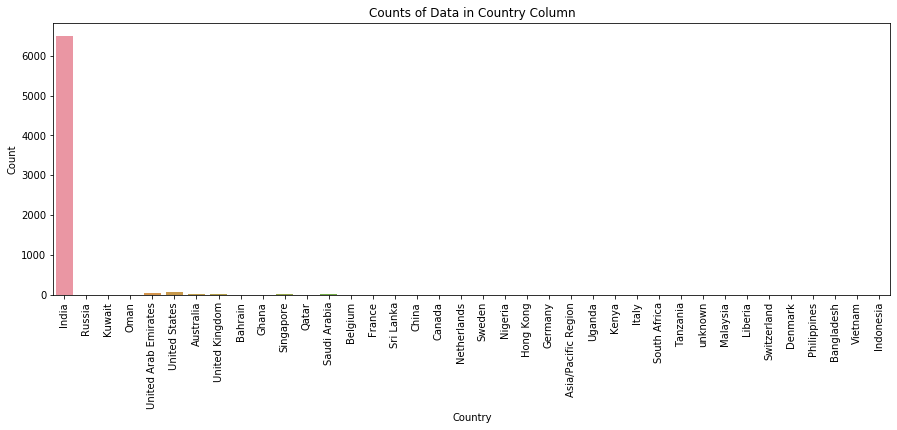

In [33]:
# Plotting a count plot to visualize counts of data for the 'Country' column

plt.figure(figsize=(15, 5))
sns.countplot(data=lead_df1, x='Country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Counts of Data in Country Column')
plt.show()

# Observation
Based on the count plot, we notice that 'India' appears most frequently, so we'll use it to fill in any missing values.

In [34]:
# Replacing the missing values with most frequent value 'India' in categorical column 'Country':-

lead_df1.Country.fillna('India',inplace=True)

In [35]:
lead_df1.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Nigeria                    4
Canada                     4
Sweden                     3
China                      2
Italy                      2
Ghana                      2
Netherlands                2
Belgium                    2
Uganda                     2
Asia/Pacific Region        2
Bangladesh                 2
Philippines                2
Indonesia                  1
Kenya                      1
Russia                     1
Vietnam                    1
Malaysia                   1
Switzerland                1
Tanzania      

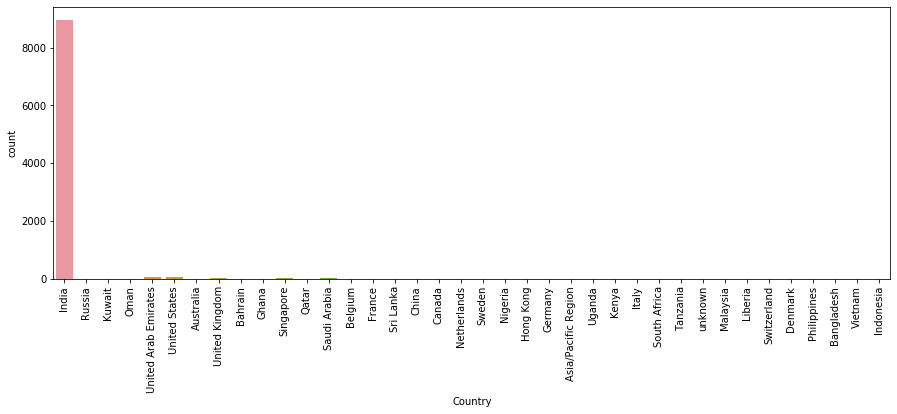

In [36]:
# Plotting a count plot to verify the Imputation

plt.figure(figsize=(15,5))
sns.countplot(x='Country', data=lead_df1)
plt.xticks(rotation=90)
plt.show()

## Observation

Before filling in missing values in the 'Country' column, around 70% of the entries were 'India'. However, after filling in missing values with 'India', this percentage increased to approximately 96%. This skewed distribution of data might not provide meaningful insights, so it's better to remove this column from the analysis.

In [37]:
# Dropping the 'Country' column from the dataframe

lead_df1.drop('Country',axis=1,inplace=True)

In [38]:
# Checking the value counts of 'Lead Source'

lead_df1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
NC_EDM                  1
testone                 1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

## Observation 
- We noticed that there are two variations of 'Google' - 'Google' and 'google'. To maintain consistency, we'll replace all occurrences of 'google' with 'Google'.

- Since 'Google' is the most common entry, we'll use it to fill in any missing values.

In [39]:
# Replacing the word 'google' with 'Google' 

lead_df1['Lead Source']=lead_df1['Lead Source'].replace('google','Google')

In [40]:
# Verifying the value counts again

lead_df1['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
NC_EDM                  1
testone                 1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

In [41]:
# Imputing the missing values with 'Google'

lead_df1['Lead Source'].fillna('Google',inplace=True)

Treating the ~1% missing value columns

In [42]:
# Checking the value counts of 'Last Activity'

lead_df1['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

## Observation
Since we don't have information about the last activity of leads with missing values, and the most common activity is 'Email Opened', we'll fill in the missing values with 'Email Opened'.

In [43]:
# Imputing the missing values with 'Email Opened'

lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(np.nan, 'Email Opened')

In [44]:
# Imputing the missing value with 'median' value for both 'TotalVisits' and 'Page Views Per Visit' columns

lead_df1['TotalVisits'].fillna(lead_df1['TotalVisits'].median(), inplace=True)

lead_df1['Page Views Per Visit'].fillna(lead_df1['Page Views Per Visit'].median(), inplace=True)

In [45]:
# Checking the shape of the dataframe

lead_df1.shape

(9240, 27)

In [46]:
# Checking the missing values after treating missing values

round(100*(lead_df1.isnull().sum()/len(lead_df1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

## Observation 
We can see there are no missing values now

# Checking columns 'Prospect ID' and 'Lead Number' 

In [47]:
# Checking the duplicate values in 'Prospect ID'

lead_df1.duplicated(subset = 'Prospect ID').sum()

0

In [48]:
# Checking the duplicate values in 'Lead Number'

lead_df1.duplicated(subset = 'Lead Number').sum()

0

## Observation 
'Prospect ID' and 'Lead Number' both have unique values for each entry, meaning they serve as identifiers for each piece of data and won't significantly affect our model. Therefore, we can remove them from our analysis.

In [49]:
# Dropping the variables 'Prospect ID' and 'Lead Number' 

lead_df1.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

# Value_counts of variables to check data balancing

In [50]:
# Checking the value_counts of the remaining variables for better data understanding

cols=list(lead_df1.iloc[:,:])  # Creating list 'cols' of variables

for i in cols:
    print(i,'=====')
    print(lead_df1[i].value_counts(), '\n')

Lead Origin =====
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Lead Source =====
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
NC_EDM                  1
testone                 1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64 

Do Not Email =====
No     8506
Yes     734
Name: Do Not Email, dtype: int64 

Do Not Call =====
No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Converted =====
0    5679
1    3561
Name: Converted, dtype: in

## Observation 

From the above value_counts data we can see that columns 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' as they have highly imbalanced or skewed data. These variables are unlikely to provide significant insights for our analysis. Therefore, it's best to remove these columns from our dataset.

#### Dropping some irrelevant columns

In [51]:
# Dropping the variables which are having imbalanced data:-

lead_df1.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [52]:
# Dropping column 'last Notable Activity':-

lead_df1.drop('Last Notable Activity',axis=1,inplace=True)

In [53]:
# Checking shape of the dataframe after dropping variables:-

lead_df1.shape

(9240, 11)

In [54]:
# Displaying head of 'lead_df1' dataframe :-

lead_df1.head()

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation A free copy of Mastering The Interview
0                      API      Olark Chat           No          0          0.0                            0                   0.0  Page Visited on Website                    Other                      Unemployed                                     No
1                      API  Organic Search           No          0          5.0                          674                   2.5             Email Opened                    Other                      Unemployed                                     No
2  Landing Page Submission  Direct Traffic           No          1          2.0                         1532                   2.0             Email Opened  Business Administration                         Student                                    Yes
3  Landing Page Submission  Direct Traffic           No          0          1.0                          305                   1.0              Unreachable    Media and Advertising                      Unemployed                                     No
4  Landing Page Submission          Google           No          1          2.0                         1428                   1.0        Converted to Lead                    Other                      Unemployed                                     No

# Step 3: Exploratory Data Analysis(EDA)

### Univariate Analysis

In our problem, 'Converted' is the variable we're interested in predicting. It tells us whether a lead has become a customer or not.
- 0 means the lead hasn't become a customer.
- 1 means the lead has become a customer.

#### Calculating conversion rate

In [55]:
# Calculating the conversion rate:-

Converted = (sum(lead_df1['Converted'])/len(lead_df1['Converted'].index))*100
Converted

38.53896103896104

#### Checking Distribution of 'TARGET' Variable

In [56]:
# Checking the value count of target variable 'Converted':-

lead_df1.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

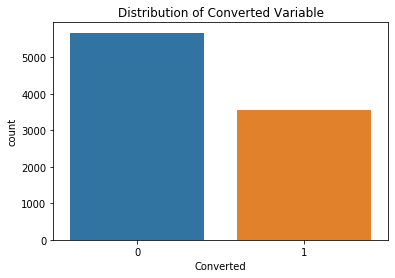

In [57]:
# Plotting a count plot to get clear view of data distribution of 'Converted' column:-

sns.countplot(lead_df1.Converted)
plt.title("Distribution of Converted Variable")
plt.show()

In [58]:
# Checking the ratio of imbalance

(lead_df1.Converted==1).sum()/(lead_df1.Converted==0).sum()

0.6270470153195985

### Observation
Looking at both the value counts and the count plot, we can see that the data is evenly balanced in terms of the ratio between the two categories.

In [59]:
# Checking the data types of remaining columns

lead_df1.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

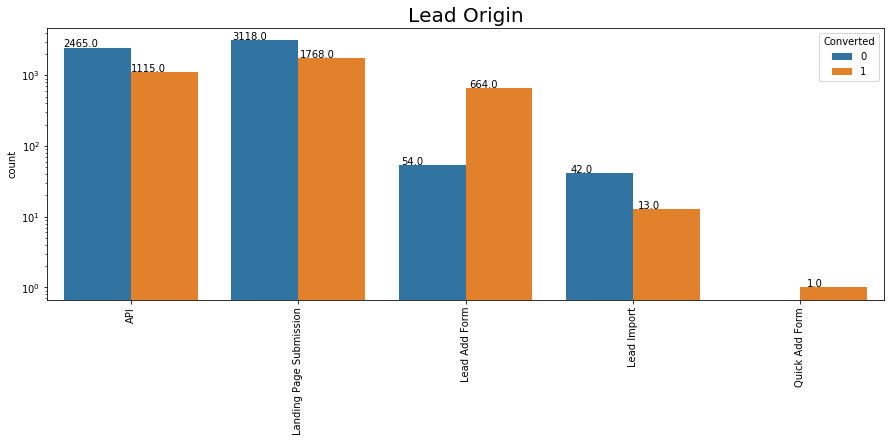

In [60]:
# Plotting a count plot of 'Lead Origin' for both 'Converted' 0 and 1 

plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=20)
ax.set_yscale('log')

plt.show()

### Observation 
From the plot above, we can see and calculate the following:

- The conversion rate for leads generated through 'API' is approximately 31%, and for leads generated through 'Landing Page Submission' is approximately 36%.
- There are more successful conversions than unsuccessful conversions for leads generated through 'Lead Add Form'.
- The count of leads imported ('Lead Import') is lower compared to other lead sources.

### Recommendation
To increase our overall lead conversion rate, we should concentrate on enhancing the conversion rates for leads from the API and Landing Page Submission sources. Additionally, we should aim to generate more leads from the Lead Add Form to further boost our conversions.

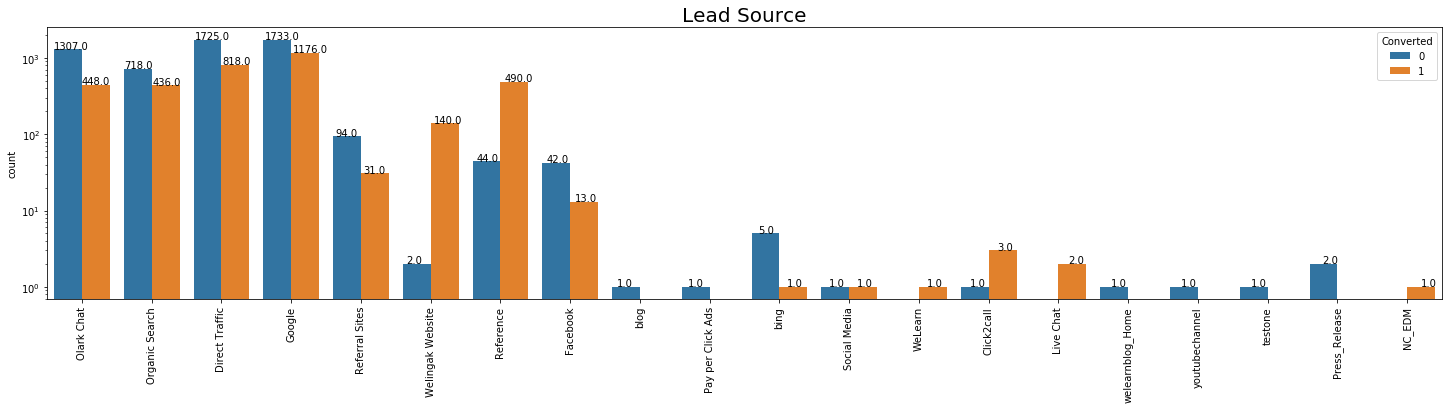

In [61]:
# Plotting a count plot of 'Lead Source' based on 'Converted' value 0 and 1 

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log') # Setting a logarithmic scale

plt.show()

#### Clubbing lower frequency values together under a common label 'Others'

In [62]:
# Combining all the low frequency values together

lead_df1['Lead Source'] = lead_df1['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel','testone',
                                                           'Press_Release','NC_EDM'], 'Others')

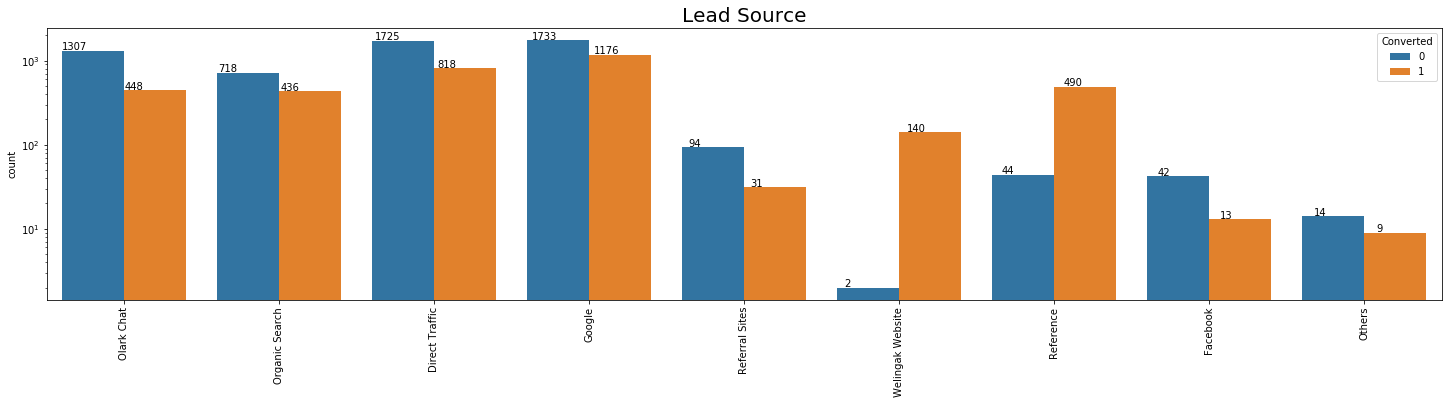

In [63]:
# Plotting a count plot of 'Lead Source' based on 'Converted' value 0 and 1 

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log')

plt.show()

### Observation
From the plot above, we can see the following:
- Google and direct traffic bring in the most leads.
- The conversion rates for leads from 'Reference' and 'Welingak Website' are high.

#### Recommendation
To boost our overall lead conversion rate, we should concentrate on improving the conversion rates of leads from Olark Chat, organic search, direct traffic, and Google. Additionally, we should aim to generate more leads from 'Reference' and 'Welingak Website' sources.

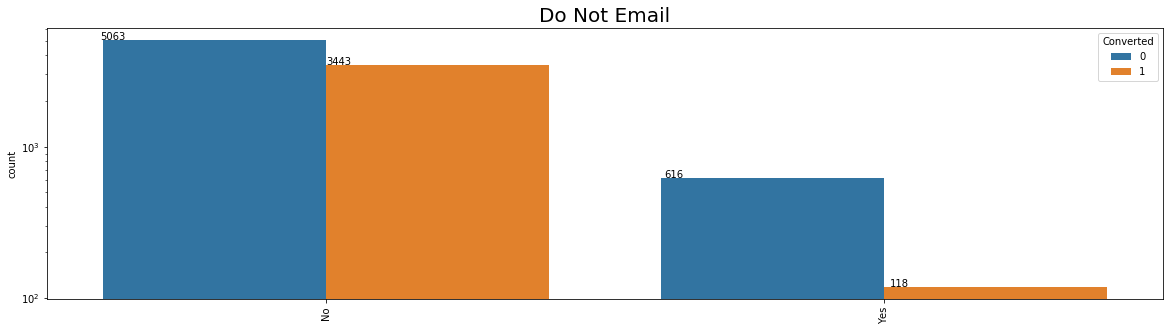

In [64]:
# Plotting a count plot of 'Lead Source' based on 'Converted' value 0 and 1 

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Do Not Email',fontsize=20)

ax.set_yscale('log') # Setting logarithmic scale

plt.show()

### Observation
- More people who choose the mail option are becoming leads.

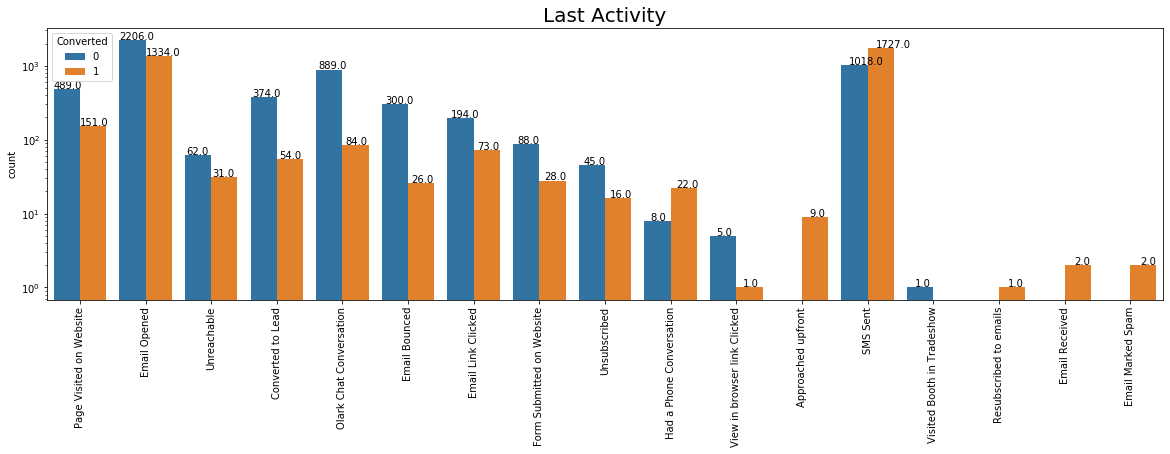

In [65]:
# Plotting a count plot of 'Lead Source' based on 'Converted' value 0 and 1 

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)

ax.set_yscale('log') # Setting logarithmic scale

plt.show()

In [66]:
# Combining all the low frequency values together under label 'Others'

lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
      'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

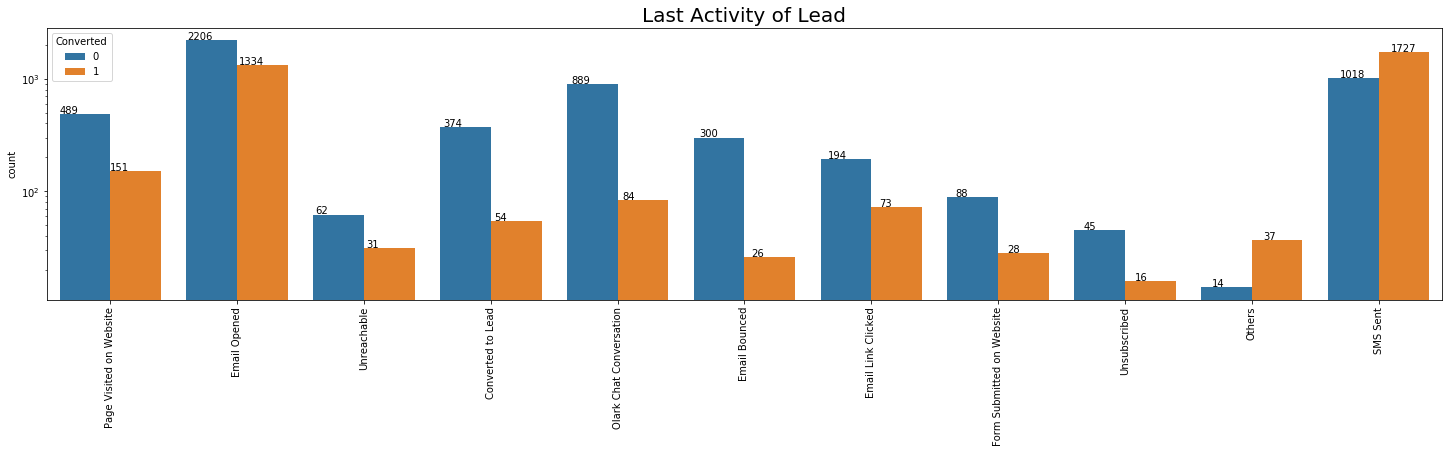

In [67]:
# Plotting count plot of 'Last Activity' based on 'Converted' value 0 and 1 

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity of Lead',fontsize=20)

ax.set_yscale('log')

plt.show()

### Observation
From the plot above, we can see that:
- The conversion rate for the last activity of 'SMS Sent' is approximately 63%.
- The most common last activity for leads is 'Email Opened'.

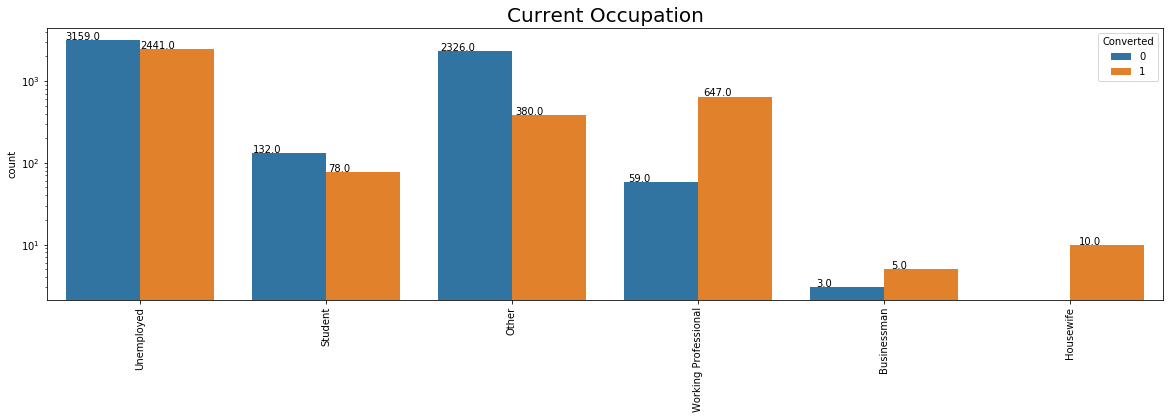

In [68]:
# Plotting a count plot of 'What is your current occupation' based on 'Converted' value 0 and 1 

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Current Occupation',fontsize=20)

ax.set_yscale('log') # Setting logarithmic scale

plt.show()

### Observation

- Leads who are 'Unemployed' are generating more leads and have a conversion rate of around 45%.
- The conversion rate is even higher for 'Working Professionals'.

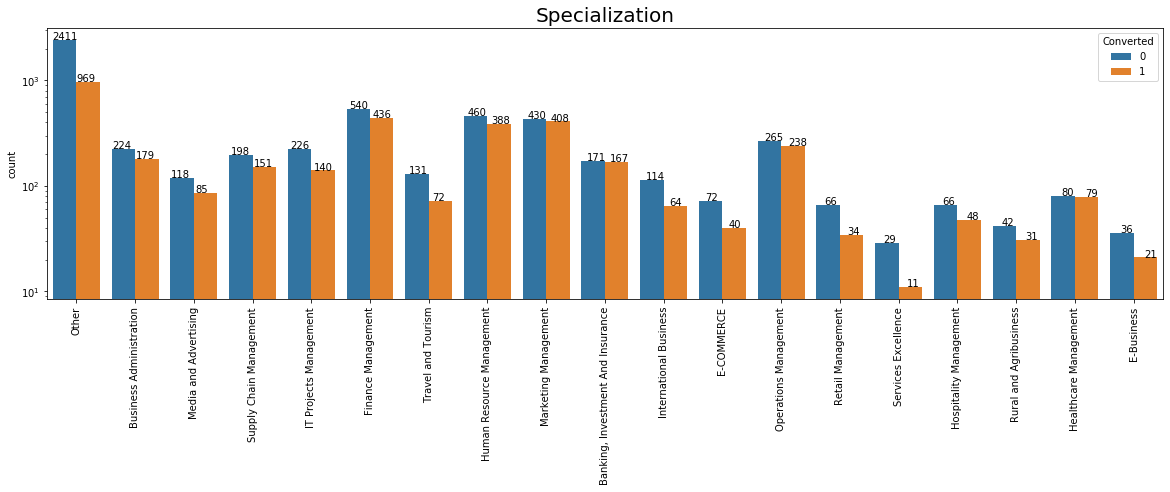

In [69]:
# Plotting a count plot of 'Specialization' based on 'Converted' value 0 and 1 

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Specialization", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Specialization',fontsize=20)

ax.set_yscale('log') # Setting logarithmic scale

plt.show()

### Observation

From the count plot above for 'Specialization', we can see that the 'Management' specialization is generating the most leads overall. Additionally, the 'Other' category is also generating a considerable number of leads.

# Outlier Analysis and treatment

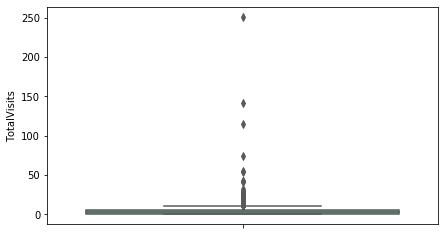

In [70]:
# Plotting a box plot to visualize data distribution of 'TotalVisits'

plt.figure(figsize = (7,4))
sns.boxplot(lead_df1['TotalVisits'],orient='v',palette='Set2')

plt.show()

### Observation
We can see from the box plot that only upper range outliers are present in the data, so we must the treat outliers

In [71]:
# Treating the outliers by capping upper range to 0.99

Q3 = lead_df1.TotalVisits.quantile(0.99)

lead_df1 = lead_df1[(lead_df1.TotalVisits <= Q3)]

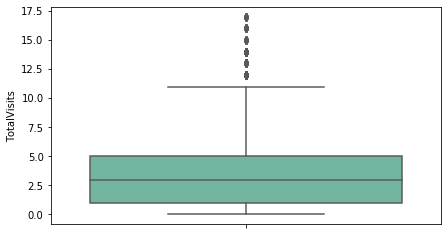

In [72]:
# Verifying the outliers after removing it 

plt.figure(figsize = (7,4))
sns.boxplot(y=lead_df1['TotalVisits'],palette='Set2')
plt.show()

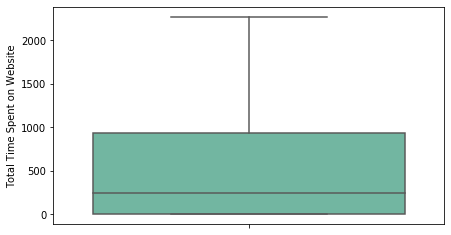

In [73]:
# Plotting a box plot to visualize data distribution of 'Total Time Spent on Website'

plt.figure(figsize=(7,4))
sns.boxplot(y=lead_df1['Total Time Spent on Website'],orient='v',palette='Set2')
plt.show()

### Bivariate Analysis

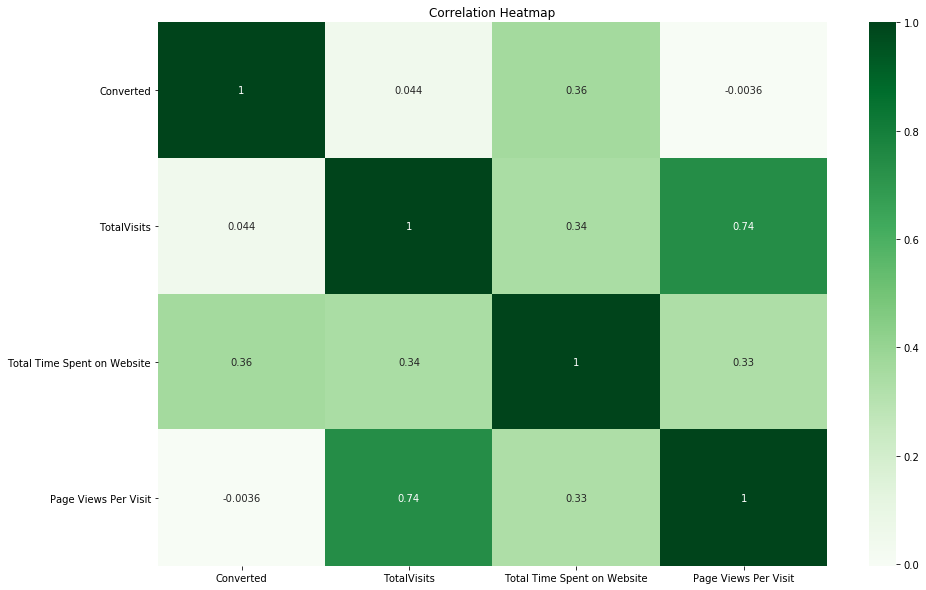

In [74]:
# Only selecting the numeric columns

numeric_columns = lead_df1.select_dtypes(include=['number'])

# Creating the correlation matrix

correlation_matrix = numeric_columns.corr()

# Plotting the heatmap

plt.figure(figsize=(15, 10))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap')
plt.show()


### Observation

- 'TotalVisits' and 'Page Views per Visit' have a strong correlation of 0.72, indicating they tend to change together.
- 'Total Time Spent on Website' has a moderate correlation of 0.36 with the target variable 'Converted', suggesting that spending more time on the website might increase the likelihood of conversion.

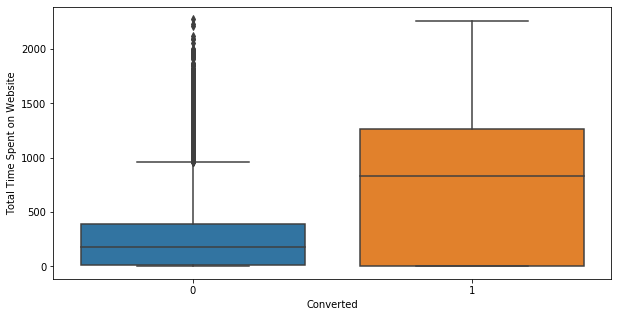

In [75]:
# Plotting box plots of "Total Time Spent on Website" vs Converted variable to check data distribution

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=lead_df1)
plt.show()

### Observation
Leads who spend more time on the website are more likely to enroll in courses or become converted customers.

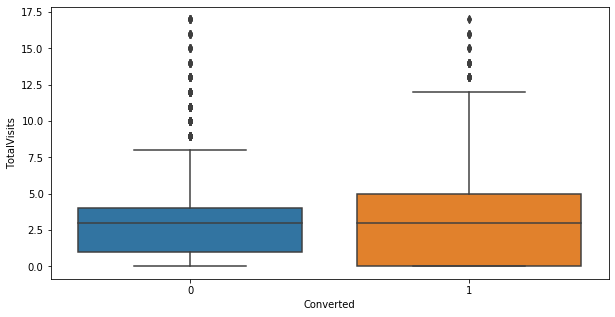

In [76]:
# Plotting box plots of "Total Visits" vs Converted variable to check data distribution

plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df1)
plt.show()

### Observation
Looking at the plot above, we can observe that the median values for both converted and non-converted leads are approximately the same.

## Step 4: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [77]:
# Variable to map

var = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function

def binary_map(x):
    if isinstance(x, str):
        return 1 if x == 'Yes' else 0
    else:
        return x

# Applying the function to the variables:

lead_df1[var] = lead_df1[var].applymap(binary_map)

In [78]:
# Checking head of dataframe again

lead_df1.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation  A free copy of Mastering The Interview
0                      API      Olark Chat             0          0          0.0                            0                   0.0  Page Visited on Website                    Other                      Unemployed                                       0
1                      API  Organic Search             0          0          5.0                          674                   2.5             Email Opened                    Other                      Unemployed                                       0
2  Landing Page Submission  Direct Traffic             0          1          2.0                         1532                   2.0             Email Opened  Business Administration                         Student                                       1
3  Landing Page Submission  Direct Traffic             0          0          1.0                          305                   1.0              Unreachable    Media and Advertising                      Unemployed                                       0
4  Landing Page Submission          Google             0          1          2.0                         1428                   1.0        Converted to Lead                    Other                      Unemployed                                       0

### Creating Dummy Variable

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [79]:
# Creating list 'cat_col' of categorical columns 

cat_col= lead_df1.select_dtypes(include=['object']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'], dtype='object')

In [80]:
# Creating dummy variable for some of the categorical variables and dropping the first one using 'drop_first=True'

dummy = pd.get_dummies(lead_df1[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True)
dummy = dummy.astype(int)

dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        1                                           0                                                  0                                          1                          0                          0                                  0   
3                                    1                          0                        0 

In [81]:
# Adding dummy variables dataset 'dummy' to original dataset 'lead_df1'

lead_df1= pd.concat([dummy,lead_df1],axis = 1)

In [82]:
#Checking head of dataframe 'lead_df1'

lead_df1.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        1                                           0                                                  0                                          1                          0                          0                                  0   
3                                    1                          0                        0 

In [83]:
# Dropping repeated columns for which dummy variables were created

lead_df1.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Specialization'
                             ],axis=1,inplace = True)

In [84]:
# Checking shape of 'lead_df1' dataframe

lead_df1.shape

(9157, 51)

In [85]:
# Checking data types column wise again

lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9157 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9157 non-null   int64  
 1   Lead Origin_Lead Add Form                             9157 non-null   int64  
 2   Lead Origin_Lead Import                               9157 non-null   int64  
 3   Lead Origin_Quick Add Form                            9157 non-null   int64  
 4   Lead Source_Facebook                                  9157 non-null   int64  
 5   Lead Source_Google                                    9157 non-null   int64  
 6   Lead Source_Olark Chat                                9157 non-null   int64  
 7   Lead Source_Organic Search                            9157 non-null   int64  
 8   Lead Source_Others                                    9157

Now you can see that you have all variables as numeric.

## Step 5: Test-Train Split

In [86]:
# Importing required library to split data

from sklearn.model_selection import train_test_split

In [87]:
# Putting feature variable to X

X = lead_df1.drop(['Converted'], axis=1)

# Displaying the head 

X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        1                                           0                                                  0                                          1                          0                          0                                  0   
3                                    1                          0                        0 

In [88]:
# Putting response variable to y

y = lead_df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [89]:
# Splitting the data into train and test of 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [90]:
# Checking shape of 'X_train' dataset after splitting

X_train.shape

(6409, 50)

In [91]:
# Checking shape of 'X_test' dataset after splitting

X_test.shape

(2748, 50)

In [92]:
# Verifying info of data set after splitting

lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9157 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9157 non-null   int64  
 1   Lead Origin_Lead Add Form                             9157 non-null   int64  
 2   Lead Origin_Lead Import                               9157 non-null   int64  
 3   Lead Origin_Quick Add Form                            9157 non-null   int64  
 4   Lead Source_Facebook                                  9157 non-null   int64  
 5   Lead Source_Google                                    9157 non-null   int64  
 6   Lead Source_Olark Chat                                9157 non-null   int64  
 7   Lead Source_Organic Search                            9157 non-null   int64  
 8   Lead Source_Others                                    9157

## Step 6: Feature Scaling

We are using 'StandardScaler' here for scaling.

In [93]:
##Importing required library for scaling 

from sklearn.preprocessing import StandardScaler

In [94]:
# Creating 'scaler' object for 'StandardScaler'

scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Displaying the head of the data after scaling
X_train.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  \
6490                                    0                          0                        0                           0                     0                   1                       0                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
4026                                    0                          0                        0                           0                     0                   1                       0                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       1                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
6453                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       1                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
8949                                    1                          0              

#### Checking the Correlation Matrix

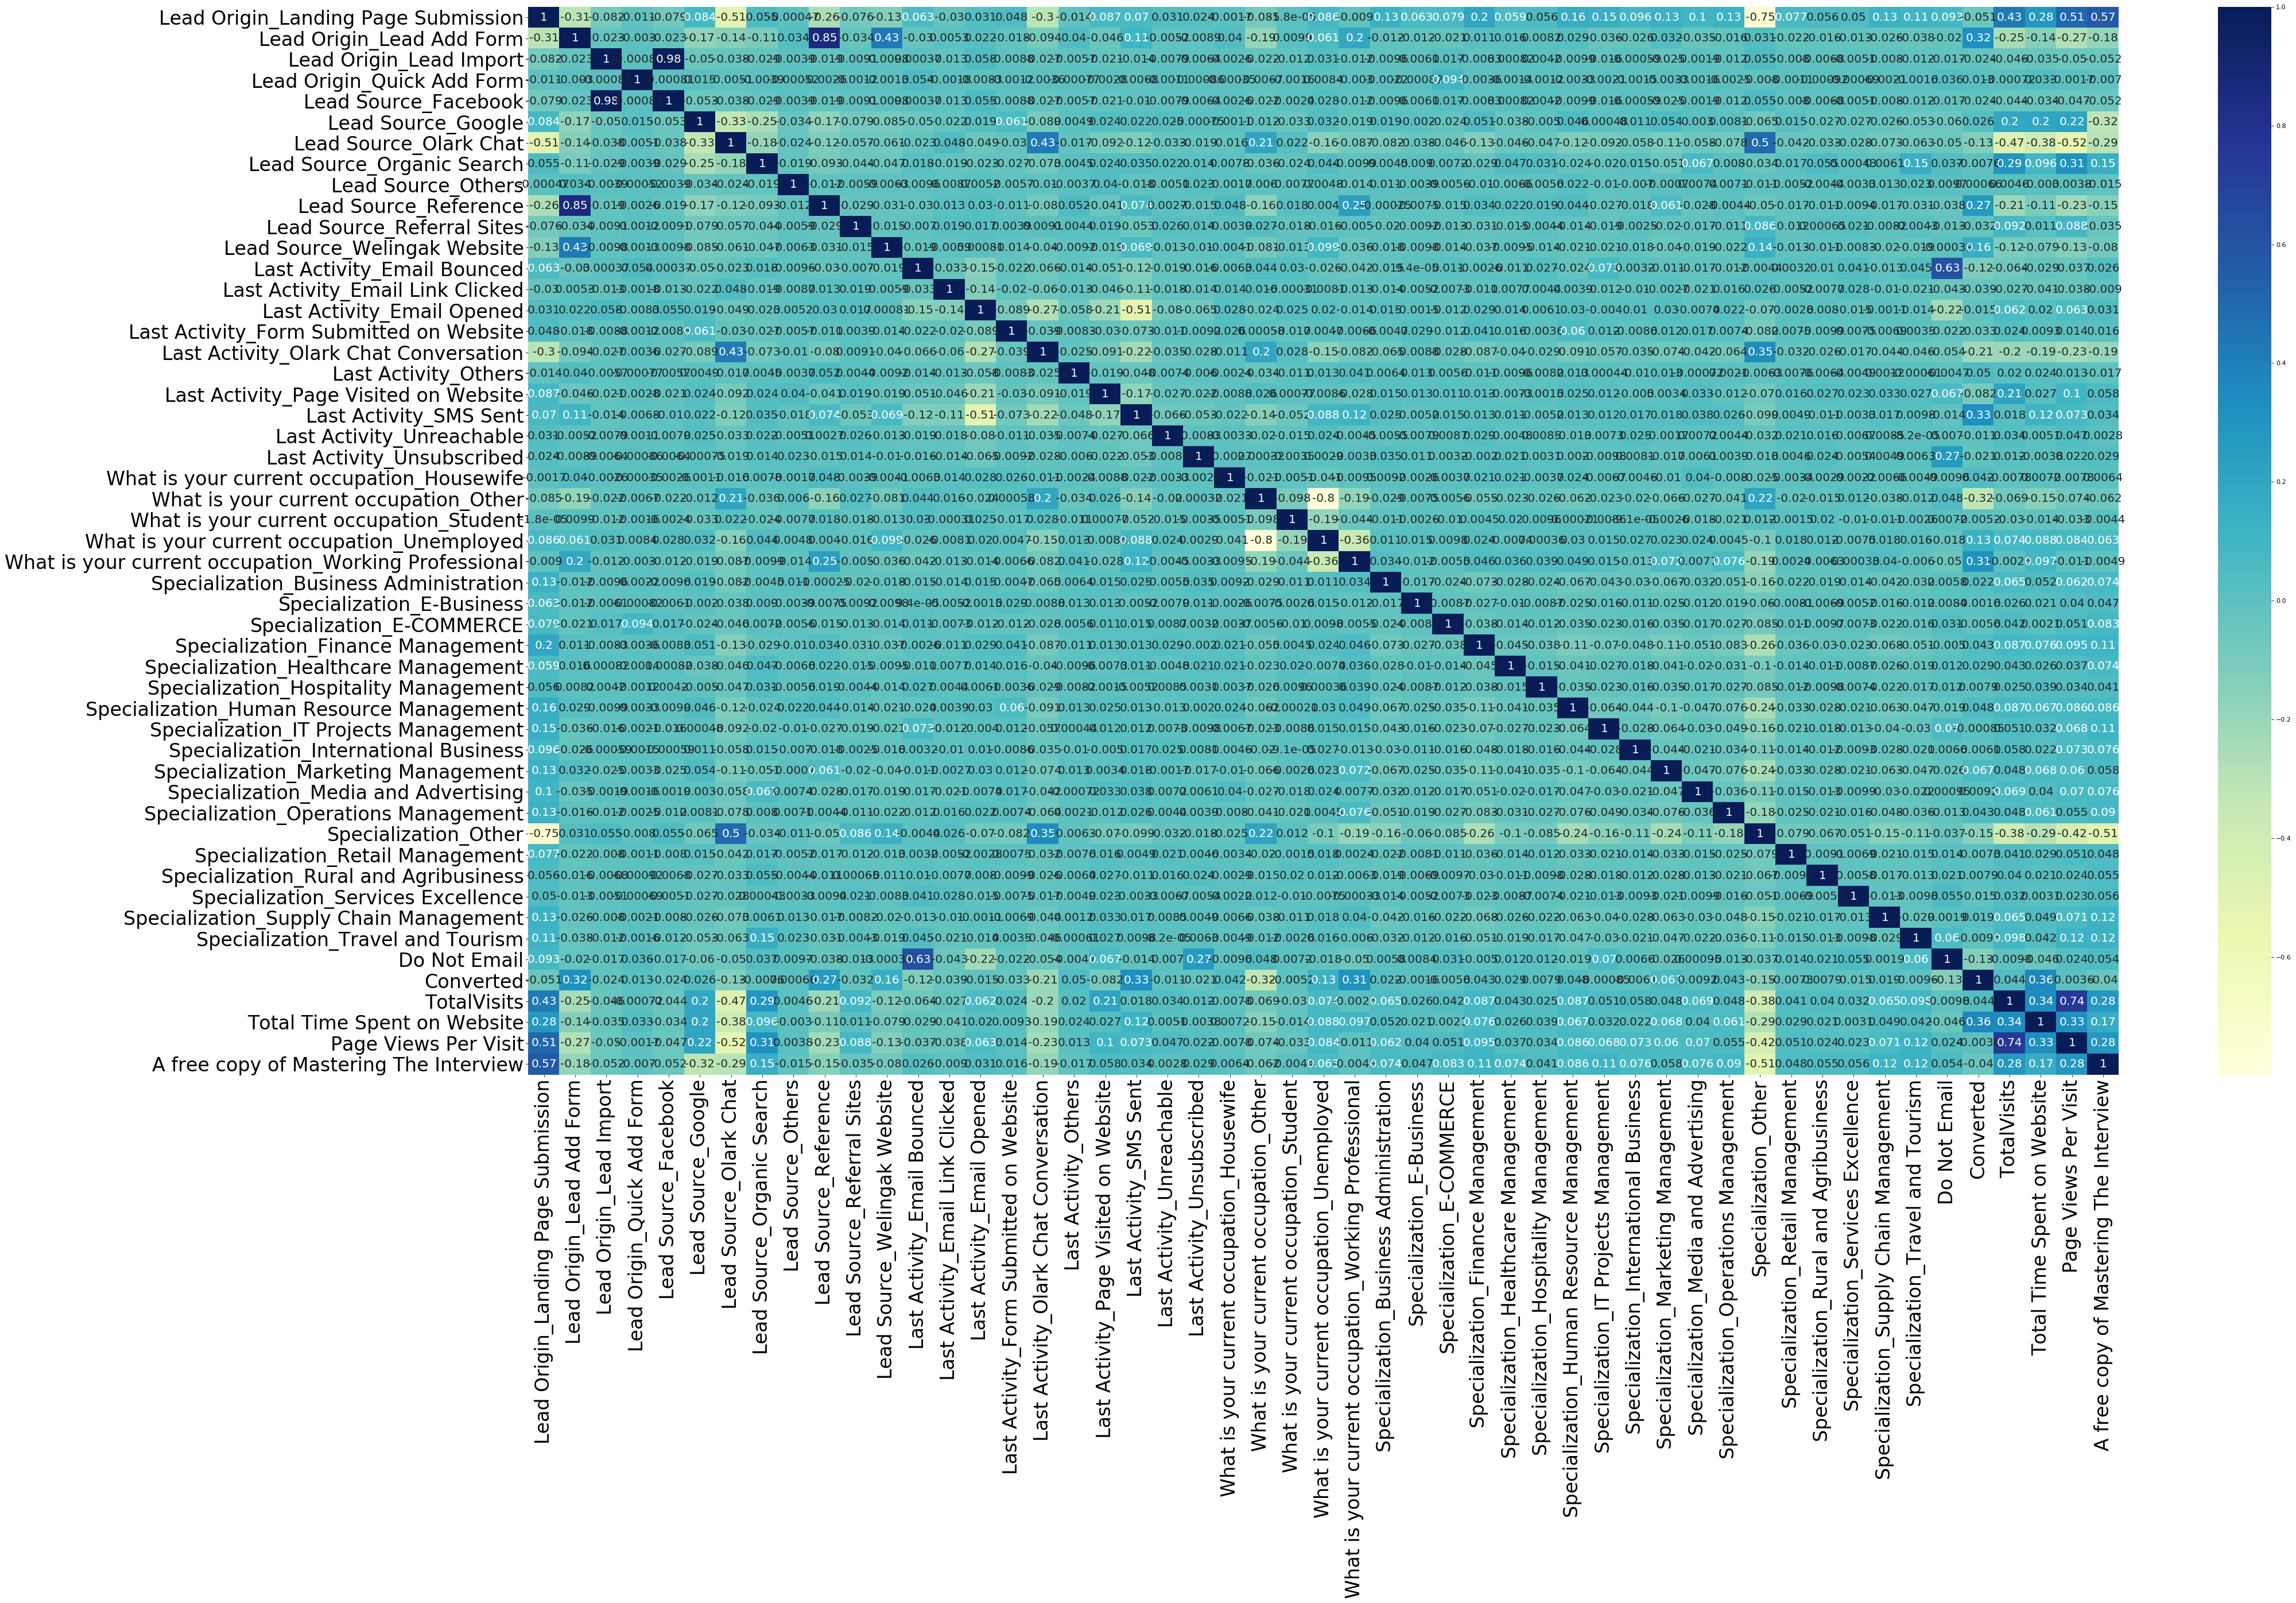

In [95]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (55, 35),dpi=80)
sns.heatmap(lead_df1.corr(), annot = True, cmap="YlGnBu",annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

### Observation

The heatmap clearly illustrates which variables are strongly related to each other and which ones have a high correlation with the target variable. We'll use this information to build our logistic model, considering different correlated values along with VIF (Variance Inflation Factor) and p-values to determine the correct variables to include or exclude from the model.

From the heatmap, we can observe the following correlations:
- 'Lead Source_Facebook' and 'Lead Origin_Lead Import' have a high correlation of 0.98.
- 'Do Not Email' and 'Last Activity_Email Bounced' are highly correlated.
- 'Lead Origin_Lead Add Form' and 'Lead Source_Reference' have a strong correlation of 0.85.
- 'TotalVisits' and 'Page Views Per Visit' have a correlation of 0.72.
- 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', and 'What is your current Occupation_Working Professionals' are positively correlated with our target variable 'Converted'.

## Step 7: Model Building

#### Model Building using Stats Model & RFE

In [96]:
#Importing 'LogisticRegression' 

from sklearn.linear_model import LogisticRegression

# Creating LogisticRegression Object called 'regressor'

regressor = LogisticRegression()

### Using RFE for feature elimination

In [97]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Example estimator

# Initialize your estimator (regressor)

regressor = LinearRegression()

# Initialize RFE with the regressor and the number of features to select

rfe = RFE(estimator=regressor, n_features_to_select=15)

# Fit RFE to your training data

rfe = rfe.fit(X_train, y_train)


In [98]:
#Displaying columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 6),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', False, 12),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 9),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', False, 20),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 10),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 3),
 ('Last Activity_Unsubscribed', False, 7),
 ('What is your current occupation_Housewife', T

In [99]:
# Storing columns selected by RFE into 'col' and displaying it

col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_SMS Sent', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'Specialization_Other', 'Total Time Spent on Website'], dtype='object')

In [100]:
# Displaying columns which are not selected by RFE

X_train.columns[~rfe.support_]

Index(['Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'What is your current occupation_Working Professional', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management',
       'Specialization_Rural

In [101]:
# Displaying columns which are not selected by RFE

X_train.columns[~rfe.support_]

Index(['Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'What is your current occupation_Working Professional', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management',
       'Specialization_Rural

In [102]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

### Using manual feature elimination

#### Running First Training Model

### Model 1
Starting with all the columns selected by RFE .

In [103]:
#Importing required 'statsmodels' library

import statsmodels.api as sm

In [104]:
# Add a constant:-

X_train_sm = sm.add_constant(X_train_rfe)

# Building first fitted model:-

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [105]:
# Print a summary of the logistic regression model obtained

logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.0
Date:                Tue, 21 May 2024   Deviance:                       5226.0
Time:                        10:03:57   Pearson chi2:                 7.70e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.1253      0.217      5.188      0.000       0.700       1.550
Lead Origin_Landing Page Submission           -0.9951      0.131     -7.576      0.000      -1.253      -0.738
Lead Origin_Lead Add Form                      2.8966      0.216     13.431      0.000       2.474       3.319
Lead Origin_Lead Import                       21.3195   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                         -21.3923   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Olark Chat                         1.2648      0.123     10.286      0.000       1.024       1.506
Lead Source_Welingak Website                   2.3340      0.749      3.114      0.002       0.865       3.803
Last Activity_Email Opened                     1.0356      0.093     11.108      0.000       0.853       1.218
Last Activity_Others                           2.0849      0.477      4.373      0.000       1.150       3.019
Last Activity_SMS Sent                         2.1210      0.097     21.771      0.000       1.930       2.312
What is your current occupation_Housewife     19.9637   1.54e+04      0.001      0.999   -3.01e+04    3.02e+04
What is your current occupation_Other         -3.4647      0.196    -17.669      0.000      -3.849      -3.080
What is your current occupation_Student       -2.2830      0.281     -8.112      0.000      -2.835      -1.731
What is your current occupation_Unemployed    -2.2099      0.183    -12.099      0.000      -2.568      -1.852
Specialization_Other                          -0.9410      0.124     -7.571      0.000      -1.185      -0.697
Total Time Spent on Website                    1.1249      0.041     27.434      0.000       1.045       1.205
==============================================================================================================
"""

### VIF Check for multicollinearity : variance_inflation_factor

In [106]:
# Importing 'variance_inflation_factor' from 'statsmodels'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                      Lead Origin_Lead Import  38.36
3                         Lead Source_Facebook  38.34
12  What is your current occupation_Unemployed   5.89
0          Lead Origin_Landing Page Submission   5.23
13                        Specialization_Other   3.97
10       What is your current occupation_Other   3.77
6                   Last Activity_Email Opened   2.13
4                       Lead Source_Olark Chat   2.02
8                       Last Activity_SMS Sent   1.94
1                    Lead Origin_Lead Add Form   1.57
5                 Lead Source_Welingak Website   1.26
14                 Total Time Spent on Website   1.26
11     What is your current occupation_Student   1.22
7                         Last Activity_Others   1.02
9    What is your current occupation_Housewife   1.01

#### Dropping insignificant column and updating the model 

In [108]:
# Dropping 'What is your current occupation_Housewife' because of insignificant variable p-value=0.999(p>0.05)

X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

### Model 2

In [109]:
# Add a constant

X_train_sm2 = sm.add_constant(X_train_new)

# Building the second fitted model

logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()

In [110]:
# Print a summary of the logistic regression model obtained

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.6
Date:                Tue, 21 May 2024   Deviance:                       5227.3
Time:                        10:03:57   Pearson chi2:                 7.73e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.1421      0.217      5.271      0.000       0.717       1.567
Lead Origin_Landing Page Submission           -0.9941      0.131     -7.567      0.000      -1.252      -0.737
Lead Origin_Lead Add Form                      2.8982      0.216     13.439      0.000       2.476       3.321
Lead Origin_Lead Import                       19.3198   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                         -19.3922   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Olark Chat                         1.2653      0.123     10.288      0.000       1.024       1.506
Lead Source_Welingak Website                   2.3332      0.749      3.113      0.002       0.864       3.802
Last Activity_Email Opened                     1.0345      0.093     11.101      0.000       0.852       1.217
Last Activity_Others                           2.0825      0.477      4.366      0.000       1.148       3.017
Last Activity_SMS Sent                         2.1195      0.097     21.762      0.000       1.929       2.310
What is your current occupation_Other         -3.4814      0.196    -17.781      0.000      -3.865      -3.098
What is your current occupation_Student       -2.2999      0.281     -8.178      0.000      -2.851      -1.749
What is your current occupation_Unemployed    -2.2265      0.182    -12.212      0.000      -2.584      -1.869
Specialization_Other                          -0.9405      0.124     -7.566      0.000      -1.184      -0.697
Total Time Spent on Website                    1.1253      0.041     27.440      0.000       1.045       1.206
==============================================================================================================
"""

In [111]:
# Calculating VIF for new model

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                      Lead Origin_Lead Import  38.36
3                         Lead Source_Facebook  38.34
11  What is your current occupation_Unemployed   5.87
0          Lead Origin_Landing Page Submission   5.22
12                        Specialization_Other   3.96
9        What is your current occupation_Other   3.76
6                   Last Activity_Email Opened   2.12
4                       Lead Source_Olark Chat   2.02
8                       Last Activity_SMS Sent   1.94
1                    Lead Origin_Lead Add Form   1.57
5                 Lead Source_Welingak Website   1.26
13                 Total Time Spent on Website   1.26
10     What is your current occupation_Student   1.22
7                         Last Activity_Others   1.02

#### Dropping insignificant column and updating the model

In [112]:
# Dropping 'Last Activity_Others' because of  p-value=0.01

X_train_new = X_train_new.drop(["Last Activity_Others"], axis = 1)

### Model 3

In [113]:
# Adding constant

X_train_sm3 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [114]:
# Print a summary of the logistic regression model obtained

logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.7
Date:                Tue, 21 May 2024   Deviance:                       5247.4
Time:                        10:03:58   Pearson chi2:                 6.98e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.2203      0.216      5.644      0.000       0.796       1.644
Lead Origin_Landing Page Submission           -0.9935      0.131     -7.572      0.000      -1.251      -0.736
Lead Origin_Lead Add Form                      2.9235      0.215     13.589      0.000       2.502       3.345
Lead Origin_Lead Import                       19.3006   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                         -19.3778   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Olark Chat                         1.2577      0.123     10.251      0.000       1.017       1.498
Lead Source_Welingak Website                   2.2952      0.749      3.065      0.002       0.827       3.763
Last Activity_Email Opened                     0.9786      0.092     10.678      0.000       0.799       1.158
Last Activity_SMS Sent                         2.0636      0.096     21.528      0.000       1.876       2.251
What is your current occupation_Other         -3.5110      0.196    -17.917      0.000      -3.895      -3.127
What is your current occupation_Student       -2.3382      0.281     -8.320      0.000      -2.889      -1.787
What is your current occupation_Unemployed    -2.2476      0.183    -12.313      0.000      -2.605      -1.890
Specialization_Other                          -0.9393      0.124     -7.568      0.000      -1.183      -0.696
Total Time Spent on Website                    1.1257      0.041     27.519      0.000       1.046       1.206
==============================================================================================================
"""

In [115]:
# Calculating VIF for new model

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                      Lead Origin_Lead Import  38.36
3                         Lead Source_Facebook  38.34
10  What is your current occupation_Unemployed   5.86
0          Lead Origin_Landing Page Submission   5.20
11                        Specialization_Other   3.96
8        What is your current occupation_Other   3.76
6                   Last Activity_Email Opened   2.10
4                       Lead Source_Olark Chat   2.01
7                       Last Activity_SMS Sent   1.92
1                    Lead Origin_Lead Add Form   1.55
5                 Lead Source_Welingak Website   1.26
12                 Total Time Spent on Website   1.25
9      What is your current occupation_Student   1.22

### Observation

From the 'logm3' model, we observe that the p-values of variables are significant, and the VIF values are below 3. This indicates that all the variables in the model are important and not highly correlated with each other. Therefore, we don't need to remove any more variables, and we can proceed to make predictions using this model ('logm3') as our final model.

### Making prediction on 'train' dataset based on final model

In [116]:
# Calculating predicted values of 'y_train'

y_train_pred = logm3.predict(X_train_sm3)
                            
y_train_pred[:10] # Displaying 10 values

6490    0.052032
4026    0.364916
6453    0.473847
8949    0.152922
6467    0.305573
3481    0.034628
2209    0.445759
1608    0.549000
2969    0.080715
8560    0.116149
dtype: float64

In [117]:
# Reshaping 

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05203187, 0.36491642, 0.47384737, 0.15292162, 0.305573  ,
       0.03462763, 0.44575941, 0.54900004, 0.08071545, 0.1161493 ])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [118]:
# Creating dataframe 'y_train_pred_final' with actual and predicted 

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.052032         6490
1          1        0.364916         4026
2          1        0.473847         6453
3          1        0.152922         8949
4          0        0.305573         6467

## Step 8: Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [119]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0        0.052032         6490    1    0    0    0    0    0    0    0    0    0
1          1        0.364916         4026    1    1    1    1    0    0    0    0    0    0
2          1        0.473847         6453    1    1    1    1    1    0    0    0    0    0
3          1        0.152922         8949    1    1    0    0    0    0    0    0    0    0
4          0        0.305573         6467    1    1    1    1    0    0    0    0    0    0

In [120]:
# Importing 'metrics' library

from sklearn import metrics

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386956  1.000000  0.000000
0.1   0.1  0.620378  0.977419  0.395011
0.2   0.2  0.760649  0.918548  0.660982
0.3   0.3  0.789203  0.864113  0.741919
0.4   0.4  0.816352  0.772581  0.843981
0.5   0.5  0.821033  0.711290  0.890303
0.6   0.6  0.798721  0.600806  0.923645
0.7   0.7  0.781713  0.527823  0.941970
0.8   0.8  0.754096  0.419355  0.965386
0.9   0.9  0.708379  0.265726  0.987783


In [121]:
# Setting the plot style

sns.set(style = 'darkgrid')

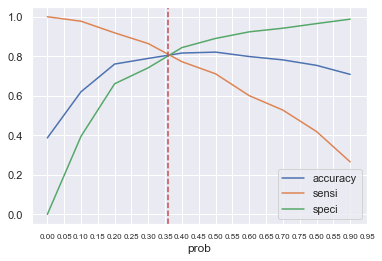

In [122]:
# Plotting accuracy, sensitivity and specificity for various probabilities

# plt.figure(figsize=(20,5))

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline

plt.show()

#### From the curve above, it seems that  0.358 is optimal cutoff point to take .

In [123]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [124]:
# Dropping the unnecessary columns

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [125]:
# Displaying the head

y_train_pred_final.head() 

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.052032         6490                0
1          1        0.364916         4026                1
2          1        0.473847         6453                1
3          1        0.152922         8949                0
4          0        0.305573         6467                0

### Assigning lead score to the leads based to prediction

In [126]:
# Assigning the 'Lead_Score' based on 'Converted_Prob' 

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [127]:
# Selecting only important columns and displaying head of dataframe

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.052032         6490                0           5
1          1        0.364916         4026                1          36
2          1        0.473847         6453                1          47
3          1        0.152922         8949                0          15
4          0        0.305573         6467                0          31

## Step 9: Model Evaluation

### Confusion Matrix 

In [128]:
# Importing 'metrics' library

from sklearn import metrics

# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3206  723]
 [ 496 1984]]


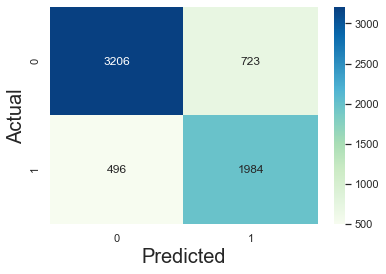

In [129]:
from sklearn.metrics import confusion_matrix

# Plotting confusion matrix

sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()


In [130]:
# Actual/Predicted     not_converted   converted
    # not_converted        3206          723
    # converted            496          1984 

In [131]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8097987205492276

In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
# Checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8

In [134]:
# Calculating specificity

TN / float(TN+FP)

0.8159837108679053

In [135]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.18401628913209467


In [136]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7329146656815663


In [137]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8660183684494868


## Precision and Recall

##### Precision
TP / TP + FP

In [138]:
# Calculating 'Recall' 

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8

Using sklearn utilities for the same

In [139]:
# Importing 'precision_score' and 'recall_score'

from sklearn.metrics import precision_score, recall_score

In [140]:
# Calculating Precision value

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7329146656815663

In [141]:
# Calculating Recall value

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8

### Observation

We have the following values for the Train Data:

- Accuracy :    80%
- Sensitivity : 80%
- Specificity : 81%
- Pricision:    72%
- Recall:       80%

## Step 10: Plotting the ROC Curve

An ROC curve tells us a few important things:

- It helps us understand the balance between sensitivity (the ability to correctly identify positive cases) and specificity (the ability to correctly identify negative cases). If we improve sensitivity, we might decrease specificity, and vice versa.
- The shape of the curve indicates how accurate the test is. A curve that hugs the top-left corner of the graph is more accurate.
- If the curve is closer to the diagonal line from bottom-left to top-right, the test is less accurate.

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [143]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

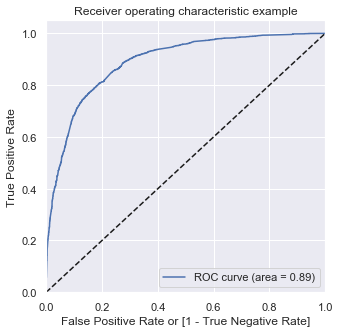

In [144]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Observation

We are getting a good value of 0.89 indicating a good predictive model.As ROC Curve should be a value close to 1. 

### Precision and recall tradeoff

In [145]:
# Importing required library for 'precision_recall_curve' 

from sklearn.metrics import precision_recall_curve

In [146]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

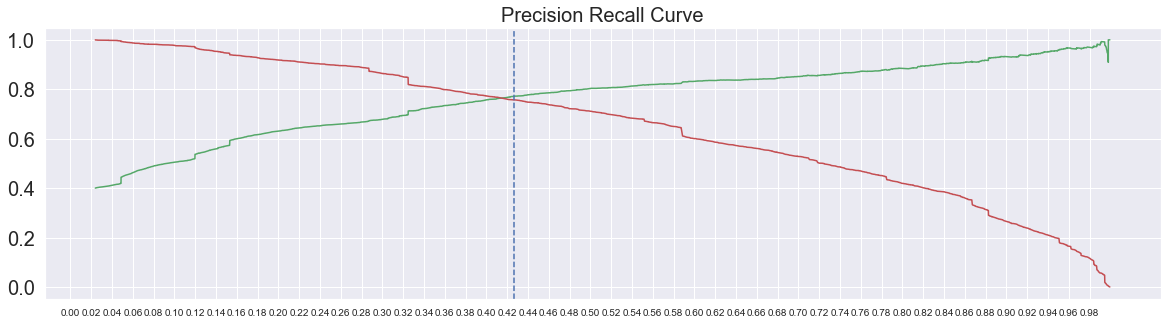

In [147]:
# Plotting a Precision Recall Curve

plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

### Observation
From above above 'precision_recall_curve' we can see that cutoff point is 0.427.

### Now using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation

In [148]:
# Plotting the Train dataset again with 0.427 as cutoff

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head() # Displaying head 

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score  final_predicted_2
0          0        0.052032         6490                0           5                  0
1          1        0.364916         4026                1          36                  0
2          1        0.473847         6453                1          47                  1
3          1        0.152922         8949                0          15                  0
4          0        0.305573         6467                0          31                  0

In [149]:
# Confusion matrix

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3374  555]
 [ 602 1878]]


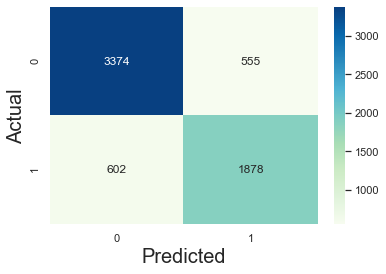

In [150]:
# Plotting confusion matrix

sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [151]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8194726166328601

In [152]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [153]:
# Checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.757258064516129

In [154]:
# Calculating specificity

TN / float(TN+FP)

0.8587426826164418

In [155]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7718865598027127


In [156]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8485915492957746


In [157]:
# Pricision

confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7718865598027127

In [158]:
# Calculating 'Recall' 

confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.757258064516129

### Observation
When we use the Precision-Recall trade-off curve, we find that adjusting the cutoff point reduces the number of true positives but increases the number of true negatives. However, this also decreases sensitivity, which is not ideal because we want to maximize the number of true positives. Therefore, we've decided to use a cutoff point of 0.358 to increase sensitivity and maximize true positives.

## Step 11: Making predictions on the test set

#### Applying scaling on test data 

In [159]:
# Applying 'transform' to scale the 'test' data set

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [160]:
# Predicting using values used by the final model i.e. logm3

test_col = X_train_sm3.columns

X_test=X_test[test_col[1:]]

# Adding constant variable to test dataframe

X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 7359 to 4744
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   const                                       2748 non-null   float64
 1   Lead Origin_Landing Page Submission         2748 non-null   int64  
 2   Lead Origin_Lead Add Form                   2748 non-null   int64  
 3   Lead Origin_Lead Import                     2748 non-null   int64  
 4   Lead Source_Facebook                        2748 non-null   int64  
 5   Lead Source_Olark Chat                      2748 non-null   int64  
 6   Lead Source_Welingak Website                2748 non-null   int64  
 7   Last Activity_Email Opened                  2748 non-null   int64  
 8   Last Activity_SMS Sent                      2748 non-null   int64  
 9   What is your current occupation_Other       2748 non-null   int64  
 10  What is y

#### Making Predictions on the X_test dataset using the final model

In [161]:
# Predicting on test data set using final model 

y_test_pred = logm3.predict(X_test)

In [162]:
# Checking top 10 rows

y_test_pred[:10]

7359    0.452297
2201    0.059722
2473    0.981354
8388    0.059490
2949    0.070774
8144    0.053239
8443    0.551574
290     0.048606
8626    0.330178
5709    0.248346
dtype: float64

In [163]:
# Converting y_test_pred to a dataframe 

y_pred_1 = pd.DataFrame(y_test_pred)

In [164]:
# Let's see the head
y_pred_1.head()

0
7359  0.452297
2201  0.059722
2473  0.981354
8388  0.059490
2949  0.070774

In [165]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [166]:
# Putting 'Prospect ID' to index

y_test_df['Prospect ID'] = y_test_df.index

In [167]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [168]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [169]:
# Displaying head of 'y_pred_final' 

y_pred_final.head()

Converted  Prospect ID         0
0          0         7359  0.452297
1          0         2201  0.059722
2          1         2473  0.981354
3          0         8388  0.059490
4          0         2949  0.070774

In [170]:
# Renaming the column '0' as 'Converted_Prob'

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [171]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [172]:
# Let's see the head of y_pred_final

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         7359          0        0.452297
1         2201          0        0.059722
2         2473          1        0.981354
3         8388          0        0.059490
4         2949          0        0.070774

In [173]:
#Assigning 'Lead Score' to dataframe 'y_pred_final'

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [174]:

y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score
0         7359          0        0.452297          45
1         2201          0        0.059722           6
2         2473          1        0.981354          98
3         8388          0        0.059490           6
4         2949          0        0.070774           7

#### Using Cutoff point of 0.357 from Sentivity - Specificity - Accuracy plot cut-off point

In [175]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.357

y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)

In [176]:
# Displaying the head of 'y_pred_final' dataframe

y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score  final_Predicted
0         7359          0        0.452297          45                1
1         2201          0        0.059722           6                0
2         2473          1        0.981354          98                1
3         8388          0        0.059490           6                0
4         2949          0        0.070774           7                0

### Test model evaluation

In [177]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7998544395924309

#### Confusion Matrix

In [178]:
# Calculating confusion matrix for test data

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1368,  335],
       [ 215,  830]])

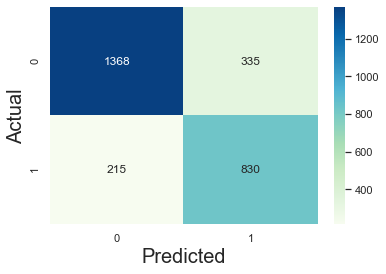

In [179]:
# Plotting confusion matrix

sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7942583732057417

In [182]:
# Let us calculate specificity

TN / float(TN+FP)

0.8032883147386964

In [183]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.1967116852613036


In [184]:
# positive predictive value 

print (TP / float(TP+FP))

0.7124463519313304


In [185]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8641819330385344


### Precision and Recall

In [186]:
# Calculating 'precision_score'

precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7124463519313304

In [187]:
#Calculating 'recall_score'

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7942583732057417

### Observation

The sensitivity (the ability to correctly identify positive cases) for both the test and train datasets is 80%. This means our model performs well at identifying positive cases in both datasets. Additionally, the accuracy of our model is around 80%, which further indicates that our model performs well on the test dataset too.

### Determining top feature based on final model (logm5)

In [188]:
# Displaying parameters obtained by final model 'logm5'

pd.options.display.float_format = '{:.2f}'.format # Setting format option
logm3.params[1:]

Lead Origin_Landing Page Submission           -0.99
Lead Origin_Lead Add Form                      2.92
Lead Origin_Lead Import                       19.30
Lead Source_Facebook                         -19.38
Lead Source_Olark Chat                         1.26
Lead Source_Welingak Website                   2.30
Last Activity_Email Opened                     0.98
Last Activity_SMS Sent                         2.06
What is your current occupation_Other         -3.51
What is your current occupation_Student       -2.34
What is your current occupation_Unemployed    -2.25
Specialization_Other                          -0.94
Total Time Spent on Website                    1.13
dtype: float64

In [189]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_feature = logm3.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Lead Origin_Landing Page Submission            -5.15
Lead Origin_Lead Add Form                      15.15
Lead Origin_Lead Import                       100.00
Lead Source_Facebook                         -100.40
Lead Source_Olark Chat                          6.52
Lead Source_Welingak Website                   11.89
Last Activity_Email Opened                      5.07
Last Activity_SMS Sent                         10.69
What is your current occupation_Other         -18.19
What is your current occupation_Student       -12.11
What is your current occupation_Unemployed    -11.65
Specialization_Other                           -4.87
Total Time Spent on Website                     5.83
dtype: float64

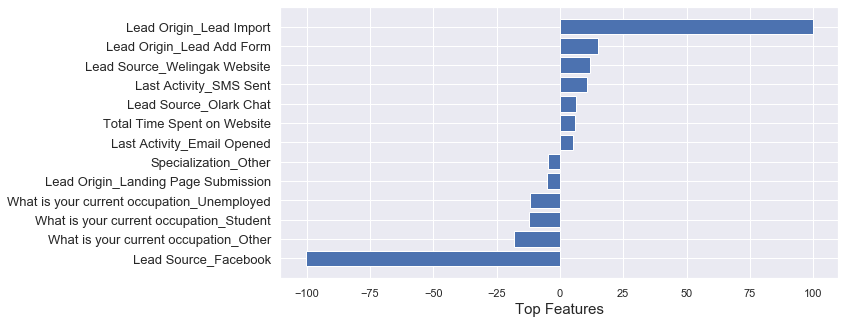

In [190]:
# Plotting the feature variables based on their relative importance

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_new.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

### Final model line equation :-

****Converted = 0.261843 + 3.15 X Lead Source_Welingak Website + 2.98 X Lead Origin_Lead Add Form  + 2.39 X What is your current occupation_Working Professional + 1.45 X Last Activity_Unsubscribed + 1.38 X Last Activity_SMS Sent + 1.17 X Lead Source_Olark Chat + 1.07 X Total Time Spent on Website - 0.87 X Lead Origin_Landing Page Submission - 0.87 X Specialization_Other - 0.96 X Specialization_Hospitality Management - 1.19 X What is your current occupation_Other - 1.22 X Last Activity_Olark Chat Conversation****

### Final Observation

Evaluation Metrics for the train Dataset:-
- Accuracy :0.80
- Sensitivity:~0.80
- Specificity:0.81
- Precision: 0.72
- Recall:    0.80

Evaluation Metrics for the test Dataset:-
- Accuracy : 0.80
- Sensitivity: ~ 0.80
- Specificity: 0.80
- Precision: 0.72
- Recall: 0.80